## Keras学习笔记

[keras.io](https://keras.io/)

[keras.io-zh](https://keras.io/zh/)

[keras-cn](https://keras-cn.readthedocs.io/en/latest/)



Keras是一个高层神经网络API，Keras由纯Python编写而成并基Tensorflow、Theano以及CNTK后端．

Keras的设计原则是

* 用户友好：Keras是为人类而不是天顶星人设计的API。用户的使用体验始终是我们考虑的首要和中心内容。Keras遵循减少认知困难的最佳实践：Keras提供一致而简洁的API， 能够极大减少一般应用下用户的工作量，同时，Keras提供清晰和具有实践意义的bug反馈。

* 模块性：模型可理解为一个层的序列或数据的运算图，完全可配置的模块可以用最少的代价自由组合在一起。具体而言，网络层、损失函数、优化器、初始化策略、激活函数、正则化方法都是独立的模块，你可以使用它们来构建自己的模型。

* 易扩展性：添加新模块超级容易，只需要仿照现有的模块编写新的类或函数即可。创建新模块的便利性使得Keras更适合于先进的研究工作。

* 与Python协作：Keras没有单独的模型配置文件类型（作为对比，caffe有），模型由python代码描述，使其更紧凑和更易debug，并提供了扩展的便利性。

*Keras的一个核心理念就是简明易用，同时保证用户对Keras的绝对控制力度，用户可以根据自己的需要定制自己的模型、网络层，甚至修改源代码。*

### 安装CNTK

```python
# Linux系统上CNTK依赖于OpenMPI
sudo apt install openmpi-bin

# install cntk
pip install https://cntk.ai/PythonWheel/CPU-Only/cntk-2.5.1-cp36-cp36m-linux_x86_64.whl
```

### 安装TensorFlow

```python
pip install tensorflow

```

### 安装Keras

```python

pip install keras

# 查看配置文件
cat ~/.keras/keras.josn

"""
{
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "tensorflow",
    "image_data_format": "channels_last"
}
"""
# 
from keras import backend

print(backend._BACKEND)

```

##### FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
解决方案：
pip install h5py==2.8.0rc1

## 使用Keras构建深度学习模型

主要精力放在如何构建模型．序貫模型（Sequential）是多个网络层的线性堆叠。
当创建一个序贯模型时，按照希望执行计算的顺序向其添加图层，一旦完成定义，通过使用底层框架编译模型来优化模型计算。
在编译模型时，可以指定要使用的损失函数和优化器来优化模型。
1. 定义模型——创建一序贯模型并添加配置层
2. 编译模型——指定损失函数和优化器，并调用模型的compile()函数， 完成模型编译
3. 训练模型——通过调用模型fit()函数来训练模型
4. 执行预测——调用模型的evaluate()或predict()等函数对新数据进行预测

Keras使用Dense类来定义完全连接层
> keras.layers.core.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

* inputshape: 2维 tensor(nb_samples, input_dim)

* outputshape: 2维 tensor(nb_samples, output_dim)

### 参数：

units：大于0的整数，代表该层的输出维度。

activation：激活函数，为预定义的激活函数名（参考激活函数），或逐元素（element-wise）的Theano函数。如果不指定该参数，将不会使用任何激活函数（即使用线性激活函数：a(x)=x）

use_bias: 布尔值，是否使用偏置项

kernel_initializer：权值初始化方法，为预定义初始化方法名的字符串，或用于初始化权重的初始化器。参考initializers

bias_initializer：偏置向量初始化方法，为预定义初始化方法名的字符串，或用于初始化偏置向量的初始化器。参考initializers

kernel_regularizer：施加在权重上的正则项，为Regularizer对象

bias_regularizer：施加在偏置向量上的正则项，为Regularizer对象

activity_regularizer：施加在输出上的正则项，为Regularizer对象

kernel_constraints：施加在权重上的约束项，为Constraints对象

bias_constraints：施加在偏置上的约束项，为Constraints对象

input_dim:可以指定输入数据的维度,**这个参数会在模型的第一层中用到。**

## keras分类模型

在设计一个神经网络时，输入层的节点数需要与特征的维度匹配，输出层的节点数要与目标的维度匹配。

一般步骤：
1. 导入数据
2. 定义模型 创建
3. 编译模型
4. 训练模型
5. 评估模型

[Pima Indians数据](http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)


In [4]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

data = pd.read_csv('data/pima-indians-diabetes.csv', header=None)

data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
data.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
x = data.iloc[:,:8]
y = data.iloc[:,8]

# 创建模型
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 编译模型
"""
模型编译时，须指定用于评估一组权重的损失函数loss，
用于搜索网络不同权重的优化器optimizer，
以及希望在模型训练期间收集和报告的可选指标 metrics
"""
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型 fit()
"""
epochs参数，对数据集进行固定次数的迭代
batch_size参数，每个批次所用实例个数
"""
model.fit(x=x, y=y, epochs=10, batch_size=50)

# 模型评估 evaluate()
scores = model.evaluate(x=x, y=y)
# print('\n', model.metrics_names[1])
print('\n', scores[1]*100)



Epoch 1/10
768/768 [==============================] - 0s 383us/step - loss: 2.8900 - acc: 0.6354
Epoch 2/10
768/768 [==============================] - 0s 48us/step - loss: 1.6426 - acc: 0.5221
Epoch 3/10
768/768 [==============================] - 0s 55us/step - loss: 1.2712 - acc: 0.4531
Epoch 4/10
768/768 [==============================] - 0s 60us/step - loss: 1.0922 - acc: 0.5026
Epoch 5/10
768/768 [==============================] - 0s 53us/step - loss: 0.9807 - acc: 0.5143
Epoch 6/10
768/768 [==============================] - 0s 55us/step - loss: 0.8859 - acc: 0.5443
Epoch 7/10
768/768 [==============================] - 0s 57us/step - loss: 0.8231 - acc: 0.5729
Epoch 8/10
768/768 [==============================] - 0s 56us/step - loss: 0.7734 - acc: 0.5781
Epoch 9/10
768/768 [==============================] - 0s 57us/step - loss: 0.7299 - acc: 0.5807
Epoch 10/10
768/768 [==============================] - 0s 127us/step

 61.588541666666664


In [38]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

data = pd.read_csv('data/pima-indians-diabetes.csv', header=None)
x = data.iloc[:,:8]
y = data.iloc[:,8]

# 创建模型
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 编译模型
"""
模型编译时，须指定用于评估一组权重的损失函数loss，
用于搜索网络不同权重的优化器optimizer，
以及希望在模型训练期间收集和报告的可选指标 metrics
"""
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型 fit()
"""
epochs参数，对数据集进行固定次数的迭代
batch_size参数，每个批次所用实例个数
"""
model.fit(x=x, y=y, epochs=10, batch_size=50, validation_split=0.2)

# 模型评估 evaluate()
scores = model.evaluate(x=x, y=y)
# print('\n', model.metrics_names[1])
print('\n', scores[1]*100)


Train on 614 samples, validate on 154 samples
Epoch 1/10
614/614 [==============================] - 0s 634us/step - loss: 5.5915 - acc: 0.6531 - val_loss: 5.7565 - val_acc: 0.6429
Epoch 2/10
614/614 [==============================] - 0s 58us/step - loss: 5.5915 - acc: 0.6531 - val_loss: 5.7565 - val_acc: 0.6429
Epoch 3/10
614/614 [==============================] - 0s 66us/step - loss: 5.5915 - acc: 0.6531 - val_loss: 5.7565 - val_acc: 0.6429
Epoch 4/10
614/614 [==============================] - 0s 76us/step - loss: 5.5915 - acc: 0.6531 - val_loss: 5.7565 - val_acc: 0.6429
Epoch 5/10
614/614 [==============================] - 0s 73us/step - loss: 5.5915 - acc: 0.6531 - val_loss: 5.7565 - val_acc: 0.6429
Epoch 6/10
614/614 [==============================] - 0s 64us/step - loss: 5.5915 - acc: 0.6531 - val_loss: 5.7565 - val_acc: 0.6429
Epoch 7/10
614/614 [==============================] - 0s 57us/step - loss: 5.5915 - acc: 0.6531 - val_loss: 5.7565 - val_acc: 0.6429
Epoch 8/10
614/614 [==

In [39]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/pima-indians-diabetes.csv', header=None)
x = data.iloc[:,:8]
y = data.iloc[:,8]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

# 创建模型
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 编译模型
"""
模型编译时，须指定用于评估一组权重的损失函数loss，
用于搜索网络不同权重的优化器optimizer，
以及希望在模型训练期间收集和报告的可选指标 metrics
"""
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型 fit()
"""
epochs参数，对数据集进行固定次数的迭代
batch_size参数，每个批次所用实例个数
"""
model.fit(x=x_train, y=y_train, epochs=10, batch_size=50, validation_data=(x_test, y_test))

# 模型评估 evaluate()
scores = model.evaluate(x=x, y=y)
# print('\n', model.metrics_names[1])
print('\n', scores[1]*100)


Train on 614 samples, validate on 154 samples
Epoch 1/10
614/614 [==============================] - 0s 661us/step - loss: 4.6098 - acc: 0.3681 - val_loss: 3.6985 - val_acc: 0.4351
Epoch 2/10
614/614 [==============================] - 0s 34us/step - loss: 3.1183 - acc: 0.4821 - val_loss: 2.6213 - val_acc: 0.5065
Epoch 3/10
614/614 [==============================] - 0s 48us/step - loss: 2.4243 - acc: 0.5147 - val_loss: 1.9197 - val_acc: 0.4805
Epoch 4/10
614/614 [==============================] - 0s 71us/step - loss: 1.7144 - acc: 0.3844 - val_loss: 1.3597 - val_acc: 0.4091
Epoch 5/10
614/614 [==============================] - 0s 69us/step - loss: 1.3582 - acc: 0.4381 - val_loss: 1.1911 - val_acc: 0.4935
Epoch 6/10
614/614 [==============================] - 0s 78us/step - loss: 1.2251 - acc: 0.4658 - val_loss: 1.1281 - val_acc: 0.4805
Epoch 7/10
614/614 [==============================] - 0s 84us/step - loss: 1.1228 - acc: 0.4756 - val_loss: 1.1182 - val_acc: 0.5065
Epoch 8/10
614/614 [==

In [43]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


# 构建模型
def create_model(optimizer='adam', init='glorot_uniform'):
    # 构建模型
    model = Sequential()
    model.add(Dense(units=12, kernel_initializer=init, input_dim=8, activation='relu'))
    model.add(Dense(units=8, kernel_initializer=init, activation='relu'))
    model.add(Dense(units=1, kernel_initializer=init, activation='sigmoid'))

    # 编译模型
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

seed = 7
# 设定随机数种子
np.random.seed(seed)

# 导入数据
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',')
# 分割输入x和输出Y
x = dataset[:, 0 : 8]
Y = dataset[:, 8]

#创建模型 for scikit-learn
model = KerasClassifier(build_fn=create_model, verbose=0)

# 构建需要调参的参数
param_grid = {}
param_grid['optimizer'] = ['rmsprop', 'adam']
param_grid['init'] = ['glorot_uniform'] # 'glorot_uniform', 'normal', 'uniform'
param_grid['epochs'] = [20, 50]
param_grid['batch_size'] = [10, 20]

# 调参
grid = GridSearchCV(estimator=model, param_grid=param_grid)
results = grid.fit(x, Y)

# 输出结果
print('Best: %f using %s' % (results.best_score_, results.best_params_))
means = results.cv_results_['mean_test_score']
stds = results.cv_results_['std_test_score']
params = results.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, std, param))


Best: 0.674479 using {'batch_size': 10, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.657552 (0.016053) with: {'batch_size': 10, 'epochs': 20, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.588542 (0.145507) with: {'batch_size': 10, 'epochs': 20, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.652344 (0.029232) with: {'batch_size': 10, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.674479 (0.011201) with: {'batch_size': 10, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.626302 (0.018136) with: {'batch_size': 20, 'epochs': 20, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.628906 (0.030425) with: {'batch_size': 20, 'epochs': 20, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.542969 (0.145880) with: {'batch_size': 20, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.666667 (0.015073) with: {'batch_size': 20, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}


## 回归问题 波士顿房价预测

In [53]:
from sklearn import datasets
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# 导入数据
dataset = datasets.load_boston()

x = dataset.data
Y = dataset.target

# 设定随机种子
seed = 7
np.random.seed(seed)

# 构建模型函数
def create_model(units_list=[13],optimizer='adam', init='normal'):
    # 构建模型
    model = Sequential()

    # 构建第一个隐藏层和输入层
    units = units_list[0]
    model.add(Dense(units=units, activation='relu', input_dim=13, kernel_initializer=init))
    # 构建更多隐藏层
    for units in units_list[1:]:
        model.add(Dense(units=units, activation='relu', kernel_initializer=init))

    model.add(Dense(units=1, kernel_initializer=init))

    # 编译模型
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    return model

model = KerasRegressor(build_fn=create_model, epochs=200, batch_size=5, verbose=0)


# 设置算法评估基准
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, x, Y, cv=kfold)
print('Baseline: %.2f (%.2f) MSE' % (results.mean(), results.std()))

# 数据正态化，改进算法
steps = []
steps.append(('standardize', StandardScaler()))
steps.append(('mlp', model))
pipeline = Pipeline(steps)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, x, Y, cv=kfold)
print('Standardize: %.2f (%.2f) MSE' % (results.mean(), results.std()))

# 调参选择最优模型
param_grid = {}
param_grid['units_list'] = [[20], [13]]  # [[20], [13, 6]]
param_grid['optimizer'] = ['rmsprop', 'adam']
param_grid['init'] = ['glorot_uniform']
param_grid['epochs'] = [20, 50]
param_grid['batch_size'] = [50, 100]

# 调参
scaler = StandardScaler()
scaler_x = scaler.fit_transform(x)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
results = grid.fit(scaler_x, Y)

# 输出结果
print('Best: %f using %s' % (results.best_score_, results.best_params_))
means = results.cv_results_['mean_test_score']
stds = results.cv_results_['std_test_score']
params = results.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, std, param))


Baseline: -22.79 (11.25) MSE
Standardize: -12.46 (7.06) MSE
Best: -285.465615 using {'batch_size': 50, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop', 'units_list': [20]}
-496.512617 (163.912689) with: {'batch_size': 50, 'epochs': 20, 'init': 'glorot_uniform', 'optimizer': 'rmsprop', 'units_list': [20]}
-496.256660 (159.615876) with: {'batch_size': 50, 'epochs': 20, 'init': 'glorot_uniform', 'optimizer': 'rmsprop', 'units_list': [13]}
-499.066636 (159.672420) with: {'batch_size': 50, 'epochs': 20, 'init': 'glorot_uniform', 'optimizer': 'adam', 'units_list': [20]}
-525.713593 (186.807627) with: {'batch_size': 50, 'epochs': 20, 'init': 'glorot_uniform', 'optimizer': 'adam', 'units_list': [13]}
-285.465615 (87.552390) with: {'batch_size': 50, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop', 'units_list': [20]}
-367.186460 (91.951576) with: {'batch_size': 50, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop', 'units_list': [13]}
-288.022819 (87.6

## 模型序列化和反序列化
keras对模型进行序列化时，会将模型结果和模型权重保存在不同的文件中。

* 模型权重通常保存在HDF5中
    * save_weights()
    * load_weights()
* 模型的结构可以保存在JSON文件或YAML文件中
    * to_json()， to_yaml()
    * model_from_json(), model_from_yaml()
    
### 通过加载模型方式建立新的模型后，必须先编译模型，然后使用加载后的模型对新数据进行预测。



In [46]:
from sklearn import datasets
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.models import model_from_json


# 导入数据
dataset = datasets.load_iris()

x = dataset.data
Y = dataset.target

# Convert labels to categorical one-hot encoding
Y_labels = to_categorical(Y, num_classes=3)

# 设定随机种子
seed = 7
np.random.seed(seed)
# 构建模型函数
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    # 构建模型
    model = Sequential()
    model.add(Dense(units=4, activation='relu', input_dim=4, kernel_initializer=init))
    model.add(Dense(units=6, activation='relu', kernel_initializer=init))
    model.add(Dense(units=3, activation='softmax', kernel_initializer=init))

    # 编译模型
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# 构建模型
model = create_model()
model.fit(x, Y_labels, epochs=200, batch_size=5, verbose=0)

scores = model.evaluate(x, Y_labels, verbose=0)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1] * 100))

# 模型保存成Json文件
model_json = model.to_json()
with open('model.json', 'w') as file:
    file.write(model_json)

# 保存模型的权重值
model.save_weights('model.json.h5')


# 从Json加载模型
with open('model.json', 'r') as file:
    model_json = file.read()

# 加载模型
new_model = model_from_json(model_json)
new_model.load_weights('model.json.h5')

# 编译模型
new_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# 评估从Json加载的模型
scores = new_model.evaluate(x, Y_labels, verbose=0)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1] * 100))

acc: 97.33%
acc: 97.33%


## 模型增量更新


In [47]:
from sklearn import datasets
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.models import model_from_json
from sklearn.model_selection import train_test_split

# 设定随机种子
seed = 7
np.random.seed(seed)

# 导入数据
dataset = datasets.load_iris()

x = dataset.data
Y = dataset.target

x_train, x_increment, Y_train, Y_increment = train_test_split(x, Y, test_size=0.2, random_state=seed)

# Convert labels to categorical one-hot encoding
Y_train_labels = to_categorical(Y_train, num_classes=3)


# 构建模型函数
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    # 构建模型
    model = Sequential()
    model.add(Dense(units=4, activation='relu', input_dim=4, kernel_initializer=init))
    model.add(Dense(units=6, activation='relu', kernel_initializer=init))
    model.add(Dense(units=3, activation='softmax', kernel_initializer=init))

    # 编译模型
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# 构建模型
model = create_model()
model.fit(x_train, Y_train_labels, epochs=10, batch_size=5, verbose=2)

scores = model.evaluate(x_train, Y_train_labels, verbose=0)
print('Base %s: %.2f%%' % (model.metrics_names[1], scores[1] * 100))

# 模型保存成Json文件
model_json = model.to_json()
with open('model.increment.json', 'w') as file:
    file.write(model_json)

# 保存模型的权重值
model.save_weights('model.increment.json.h5')


# 从Json加载模型
with open('model.increment.json', 'r') as file:
    model_json = file.read()

# 加载模型
new_model = model_from_json(model_json)
new_model.load_weights('model.increment.json.h5')

# 编译模型
new_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# 增量训练模型
# Convert labels to categorical one-hot encoding
Y_increment_labels = to_categorical(Y_increment, num_classes=3)
new_model.fit(x_increment, Y_increment_labels, epochs=10, batch_size=5, verbose=2)
scores = new_model.evaluate(x_increment, Y_increment_labels, verbose=0)
print('Increment %s: %.2f%%' % (model.metrics_names[1], scores[1] * 100))

Epoch 1/10
 - 4s - loss: 1.0142 - acc: 0.4000
Epoch 2/10
 - 0s - loss: 0.9719 - acc: 0.4750
Epoch 3/10
 - 0s - loss: 0.9392 - acc: 0.5500
Epoch 4/10
 - 0s - loss: 0.9056 - acc: 0.5833
Epoch 5/10
 - 0s - loss: 0.8719 - acc: 0.5833
Epoch 6/10
 - 0s - loss: 0.8309 - acc: 0.6000
Epoch 7/10
 - 0s - loss: 0.7890 - acc: 0.5500
Epoch 8/10
 - 0s - loss: 0.7533 - acc: 0.5083
Epoch 9/10
 - 0s - loss: 0.7270 - acc: 0.5250
Epoch 10/10
 - 0s - loss: 0.7057 - acc: 0.7750
Base acc: 80.00%
Epoch 1/10
 - 3s - loss: 0.8127 - acc: 0.7333
Epoch 2/10
 - 0s - loss: 0.8039 - acc: 0.7333
Epoch 3/10
 - 0s - loss: 0.7975 - acc: 0.7333
Epoch 4/10
 - 0s - loss: 0.7925 - acc: 0.7333
Epoch 5/10
 - 0s - loss: 0.7897 - acc: 0.7667
Epoch 6/10
 - 0s - loss: 0.7847 - acc: 0.7667
Epoch 7/10
 - 0s - loss: 0.7797 - acc: 0.8333
Epoch 8/10
 - 0s - loss: 0.7757 - acc: 0.8667
Epoch 9/10
 - 0s - loss: 0.7714 - acc: 0.8667
Epoch 10/10
 - 0s - loss: 0.7668 - acc: 0.8667
Increment acc: 86.67%


## 自动保存最优模型


In [48]:
from sklearn import datasets
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

# 导入数据
dataset = datasets.load_iris()

x = dataset.data
Y = dataset.target

# Convert labels to categorical one-hot encoding
Y_labels = to_categorical(Y, num_classes=3)

# 设定随机种子
seed = 7
np.random.seed(seed)
# 构建模型函数
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    # 构建模型
    model = Sequential()
    model.add(Dense(units=4, activation='relu', input_dim=4, kernel_initializer=init))
    model.add(Dense(units=6, activation='relu', kernel_initializer=init))
    model.add(Dense(units=3, activation='softmax', kernel_initializer=init))

    # 编译模型
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# 构建模型
model = create_model()

# 设置检查点
filepath = 'weights.best.h5'
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]
model.fit(x, Y_labels, validation_split=0.2, epochs=200, batch_size=5, verbose=0, callbacks=callback_list)




Epoch 00001: val_acc improved from -inf to 0.00000, saving model to weights.best.h5

Epoch 00002: val_acc did not improve from 0.00000

Epoch 00003: val_acc did not improve from 0.00000

Epoch 00004: val_acc did not improve from 0.00000

Epoch 00005: val_acc did not improve from 0.00000

Epoch 00006: val_acc did not improve from 0.00000

Epoch 00007: val_acc did not improve from 0.00000

Epoch 00008: val_acc did not improve from 0.00000

Epoch 00009: val_acc did not improve from 0.00000

Epoch 00010: val_acc did not improve from 0.00000

Epoch 00011: val_acc did not improve from 0.00000

Epoch 00012: val_acc did not improve from 0.00000

Epoch 00013: val_acc did not improve from 0.00000

Epoch 00014: val_acc did not improve from 0.00000

Epoch 00015: val_acc did not improve from 0.00000

Epoch 00016: val_acc did not improve from 0.00000

Epoch 00017: val_acc did not improve from 0.00000

Epoch 00018: val_acc did not improve from 0.00000

Epoch 00019: val_acc did not improve from 0.000


Epoch 00158: val_acc did not improve from 0.80000

Epoch 00159: val_acc did not improve from 0.80000

Epoch 00160: val_acc did not improve from 0.80000

Epoch 00161: val_acc did not improve from 0.80000

Epoch 00162: val_acc did not improve from 0.80000

Epoch 00163: val_acc did not improve from 0.80000

Epoch 00164: val_acc did not improve from 0.80000

Epoch 00165: val_acc did not improve from 0.80000

Epoch 00166: val_acc did not improve from 0.80000

Epoch 00167: val_acc did not improve from 0.80000

Epoch 00168: val_acc did not improve from 0.80000

Epoch 00169: val_acc did not improve from 0.80000

Epoch 00170: val_acc did not improve from 0.80000

Epoch 00171: val_acc did not improve from 0.80000

Epoch 00172: val_acc did not improve from 0.80000

Epoch 00173: val_acc did not improve from 0.80000

Epoch 00174: val_acc did not improve from 0.80000

Epoch 00175: val_acc did not improve from 0.80000

Epoch 00176: val_acc did not improve from 0.80000

Epoch 00177: val_acc did not i

## 从检查点导入模型

In [49]:
from sklearn import datasets
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# 导入数据
dataset = datasets.load_iris()

x = dataset.data
Y = dataset.target

# Convert labels to categorical one-hot encoding
Y_labels = to_categorical(Y, num_classes=3)

# 设定随机种子
seed = 7
np.random.seed(seed)
# 构建模型函数
def load_model(optimizer='rmsprop', init='glorot_uniform'):
    # 构建模型
    model = Sequential()
    model.add(Dense(units=4, activation='relu', input_dim=4, kernel_initializer=init))
    model.add(Dense(units=6, activation='relu', kernel_initializer=init))
    model.add(Dense(units=3, activation='softmax', kernel_initializer=init))

    # 加载权重
    filepath = 'weights.best.h5'
    model.load_weights(filepath=filepath)

    # 编译模型
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# 构建模型
model = load_model()

# 评估模型
scores = model.evaluate(x, Y_labels, verbose=0)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1] * 100))



acc: 94.00%


## 模型训练过程可视化

acc: 92.67%
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


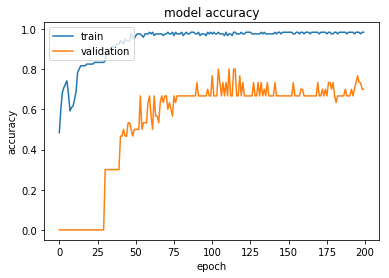

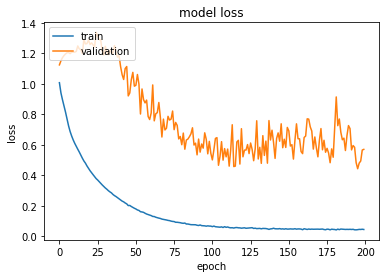

In [51]:
%matplotlib inline
from sklearn import datasets
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from matplotlib import pyplot as plt


# 导入数据
dataset = datasets.load_iris()

x = dataset.data
Y = dataset.target

# Convert labels to categorical one-hot encoding
Y_labels = to_categorical(Y, num_classes=3)

# 设定随机种子
seed = 7
np.random.seed(seed)
# 构建模型函数
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    # 构建模型
    model = Sequential()
    model.add(Dense(units=4, activation='relu', input_dim=4, kernel_initializer=init))
    model.add(Dense(units=6, activation='relu', kernel_initializer=init))
    model.add(Dense(units=3, activation='softmax', kernel_initializer=init))

    # 编译模型
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# 构建模型
model = create_model()

history = model.fit(x, Y_labels, validation_split=0.2, epochs=200, batch_size=5, verbose=0)

# 评估模型
scores = model.evaluate(x, Y_labels, verbose=0)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1] * 100))

# Hisotry列表
print(history.history.keys())

# accuracy的历史
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# loss的历史
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 学习率指数衰减 

In [52]:
from sklearn import datasets
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from math import pow, floor


# 导入数据
dataset = datasets.load_iris()

x = dataset.data
Y = dataset.target

# 设定随机种子
seed = 7
np.random.seed(seed)

# 计算学习率
def step_decay(epoch):
    init_lrate = 0.1
    drop = 0.5
    epochs_drop = 10
    lrate = init_lrate * pow(drop, floor(1 + epoch) / epochs_drop)
    return lrate

# 构建模型函数
def create_model(init='glorot_uniform'):
    # 构建模型
    model = Sequential()
    model.add(Dense(units=4, activation='relu', input_dim=4, kernel_initializer=init))
    model.add(Dense(units=6, activation='relu', kernel_initializer=init))
    model.add(Dense(units=3, activation='softmax', kernel_initializer=init))

    #模型优化
    learningRate = 0.1
    momentum = 0.9
    decay_rate = 0.0
    sgd = SGD(lr=learningRate, momentum=momentum, decay=decay_rate, nesterov=False)

    # 编译模型
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

    return model


lrate = LearningRateScheduler(step_decay)
epochs = 200
model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=5, verbose=1, callbacks=[lrate])
model.fit(x, Y)

Epoch 1/200
150/150 [==============================] - 5s 34ms/step - loss: 0.8202 - acc: 0.5600
Epoch 2/200
150/150 [==============================] - 0s 1ms/step - loss: 1.4609 - acc: 0.4600
Epoch 3/200
150/150 [==============================] - 0s 1ms/step - loss: 1.1486 - acc: 0.3200
Epoch 4/200
150/150 [==============================] - 0s 1ms/step - loss: 1.1088 - acc: 0.3333
Epoch 5/200
150/150 [==============================] - 0s 1ms/step - loss: 1.1059 - acc: 0.3467
Epoch 6/200
150/150 [==============================] - 0s 1ms/step - loss: 1.1432 - acc: 0.3267
Epoch 7/200
150/150 [==============================] - 0s 1ms/step - loss: 1.1191 - acc: 0.3000
Epoch 8/200
150/150 [==============================] - 0s 1ms/step - loss: 1.1449 - acc: 0.3200
Epoch 9/200
150/150 [==============================] - 0s 1ms/step - loss: 1.1364 - acc: 0.3267
Epoch 10/200
150/150 [==============================] - 0s 1ms/step - loss: 1.1328 - acc: 0.3000
Epoch 11/200
150/150 [================

150/150 [==============================] - 0s 1ms/step - loss: 1.0987 - acc: 0.2867
Epoch 86/200
150/150 [==============================] - 0s 1ms/step - loss: 1.0987 - acc: 0.2600
Epoch 87/200
150/150 [==============================] - 0s 1ms/step - loss: 1.0987 - acc: 0.2800
Epoch 88/200
150/150 [==============================] - 0s 1ms/step - loss: 1.0987 - acc: 0.2933
Epoch 89/200
150/150 [==============================] - 0s 1ms/step - loss: 1.0987 - acc: 0.2800
Epoch 90/200
150/150 [==============================] - 0s 1ms/step - loss: 1.0987 - acc: 0.3133
Epoch 91/200
150/150 [==============================] - 0s 1ms/step - loss: 1.0987 - acc: 0.3333
Epoch 92/200
150/150 [==============================] - 0s 1ms/step - loss: 1.0986 - acc: 0.3333
Epoch 93/200
150/150 [==============================] - 0s 1ms/step - loss: 1.0987 - acc: 0.3333
Epoch 94/200
150/150 [==============================] - 0s 1ms/step - loss: 1.0987 - acc: 0.3200
Epoch 95/200
150/150 [=====================

150/150 [==============================] - 0s 1ms/step - loss: 1.0986 - acc: 0.3333
Epoch 169/200
150/150 [==============================] - 0s 1ms/step - loss: 1.0986 - acc: 0.3333
Epoch 170/200
150/150 [==============================] - 0s 1ms/step - loss: 1.0986 - acc: 0.3333
Epoch 171/200
150/150 [==============================] - 0s 968us/step - loss: 1.0986 - acc: 0.3333
Epoch 172/200
150/150 [==============================] - 0s 1ms/step - loss: 1.0986 - acc: 0.3333
Epoch 173/200
150/150 [==============================] - 0s 882us/step - loss: 1.0986 - acc: 0.3333
Epoch 174/200
150/150 [==============================] - 0s 854us/step - loss: 1.0986 - acc: 0.3333
Epoch 175/200
150/150 [==============================] - 0s 953us/step - loss: 1.0986 - acc: 0.3333
Epoch 176/200
150/150 [==============================] - 0s 1ms/step - loss: 1.0986 - acc: 0.3333
Epoch 177/200
150/150 [==============================] - 0s 1ms/step - loss: 1.0986 - acc: 0.3333
Epoch 178/200
150/150 [===

## 复杂卷积神经网络
多个卷积层

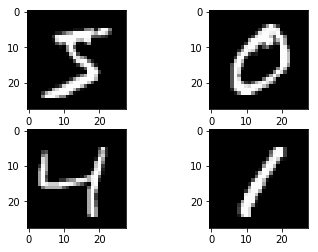

Epoch 1/10
 - 62s - loss: 0.3857 - acc: 0.8821
Epoch 2/10
 - 55s - loss: 0.0988 - acc: 0.9702
Epoch 3/10
 - 57s - loss: 0.0733 - acc: 0.9772
Epoch 4/10
 - 55s - loss: 0.0607 - acc: 0.9816
Epoch 5/10
 - 55s - loss: 0.0515 - acc: 0.9842
Epoch 6/10


KeyboardInterrupt: 

In [57]:
%matplotlib inline
from matplotlib import pyplot as plt
from keras.datasets import mnist
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import  Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend
backend.set_image_data_format('channels_first')


# 设定随机种子
seed = 7
np.random.seed(seed)

# 从Keras导入Mnist数据集
# (X_train, y_train), (X_validation, y_validation) = mnist.load_data()

# Mnist数据集 下载链接：https://pan.baidu.com/s/1jH6uFFC 密码: dw3d
path = 'data/mnist.npz'
f = np.load(path)
X_train, y_train = f['x_train'], f['y_train']
X_validation, y_validation = f['x_test'], f['y_test']
f.close()

# 显示4张手写数字的图片
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.cm.gray)

plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))

plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))

plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_validation = X_validation.reshape(X_validation.shape[0], 1, 28, 28).astype('float32')

# 格式化数据到0-1之前
X_train = X_train / 255
X_validation = X_validation / 255

# one-hot编码
y_train = np_utils.to_categorical(y_train)
y_validation = np_utils.to_categorical(y_validation)

# 创建模型
def create_model():
    model = Sequential()
    # 30个5*5卷积核
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    # 最大池化层
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # 15个3×3卷积层
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # dropout层
    model.add(Dropout(0.2))
    # flatten
    model.add(Flatten())
    # 128个神经元的全连接层
    model.add(Dense(units=128, activation='relu'))
    # 50个神经元全连接层
    model.add(Dense(units=50, activation='relu'))
    # 输出层 sotfmax
    model.add(Dense(units=10, activation='softmax'))

    # 编译模型
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.fit(X_train, y_train, epochs=10, batch_size=200, verbose=2)

score = model.evaluate(X_validation, y_validation, verbose=0)
print('CNN_Large: %.2f%%' % (score[1] * 100))

## Keras里的图像增强

keras.preprocessing.image import ImageDataGenerator # 实现图像增强处理的功能

1. 特征标准化
2. ZCA白化
3. 随机旋转，移动，剪切和反转图像
4. 维度排序
5. 保存增强后的图像

```python
keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=K.image_data_format())

"""
featurewise_center：布尔值，使输入数据集去中心化（均值为0）, 按feature执行。
samplewise_center：布尔值，使输入数据的每个样本均值为0。
featurewise_std_normalization：布尔值，将输入除以数据集的标准差以完成标准化, 按feature执行。
samplewise_std_normalization：布尔值，将输入的每个样本除以其自身的标准差。
zca_whitening：布尔值，对输入数据施加ZCA白化。
rotation_range：整数，数据提升时图片随机转动的角度。随机选择图片的角度，是一个0~180的度数，取值为0~180。
width_shift_range：浮点数，图片宽度的某个比例，数据提升时图片随机水平偏移的幅度。
height_shift_range：浮点数，图片高度的某个比例，数据提升时图片随机竖直偏移的幅度。 
height_shift_range和width_shift_range是用来指定水平和竖直方向随机移动的程度，这是两个0~1之间的比例。
shear_range：浮点数，剪切强度（逆时针方向的剪切变换角度）。是用来进行剪切变换的程度。
zoom_range：浮点数或形如[lower,upper]的列表，随机缩放的幅度，若为浮点数，则相当于[lower,upper] = [1 - zoom_range, 1+zoom_range]。用来进行随机的放大。
channel_shift_range：浮点数，随机通道偏移的幅度。
fill_mode：‘constant’，‘nearest’，‘reflect’或‘wrap’之一，当进行变换时超出边界的点将根据本参数给定的方法进行处理
cval：浮点数或整数，当fill_mode=constant时，指定要向超出边界的点填充的值。
horizontal_flip：布尔值，进行随机水平翻转。随机的对图片进行水平翻转，这个参数适用于水平翻转不影响图片语义的时候。
vertical_flip：布尔值，进行随机竖直翻转。
rescale: 值将在执行其他处理前乘到整个图像上，我们的图像在RGB通道都是0~255的整数，这样的操作可能使图像的值过高或过低，所以我们将这个值定为0~1之间的数。
preprocessing_function: 将被应用于每个输入的函数。该函数将在任何其他修改之前运行。该函数接受一个参数，为一张图片（秩为3的numpy array），并且输出一个具有相同shape的numpy array
data_format：字符串，“channel_first”或“channel_last”之一，代表图像的通道维的位置。该参数是Keras 1.x中的image_dim_ordering，“channel_last”对应原本的“tf”，“channel_first”对应原本的“th”。以128x128的RGB图像为例，“channel_first”应将数据组织为（3,128,128），而“channel_last”应将数据组织为（128,128,3）。该参数的默认值是~/.keras/keras.json中设置的值，若从未设置过，则为“channel_last”。
"""

```

## 增强前的图像

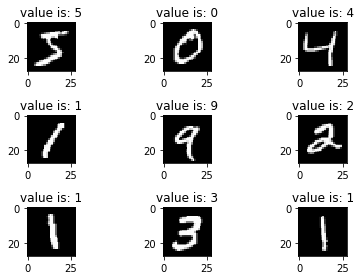

In [60]:
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np

# Mnist数据集 下载链接：https://pan.baidu.com/s/1jH6uFFC 密码: dw3d
path = 'data/mnist.npz'
f = np.load(path)
X_train, y_train = f['x_train'], f['y_train']
X_validation, y_validation = f['x_test'], f['y_test']
f.close()

for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(X_train[i], cmap=plt.cm.gray)
    plt.title("value is: {}".format(str(y_train[i])))

plt.tight_layout()
plt.show()

##  特征标准化
设置ImageDataGenerator类的featurewise_center和featurewise_std_normalization参数实现标准化处理。

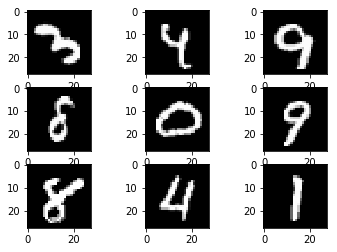

In [62]:
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import backend

backend.set_image_data_format('channels_first')

# Mnist数据集 下载链接：https://pan.baidu.com/s/1jH6uFFC 密码: dw3d
path = 'data/mnist.npz'
f = np.load(path)
X_train, y_train = f['x_train'], f['y_train']
X_validation, y_validation = f['x_test'], f['y_test']
f.close()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_validation = X_validation.reshape(X_validation.shape[0], 1, 28, 28).astype('float32')


# 标准化处理
img_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
img_gen.fit(X_train)

for X_batch, y_batch in img_gen.flow(X_train, y_train, batch_size=9):
    for i in range(9):
        plt.subplot(331+i)
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.cm.gray)
    plt.show()
    break


### ZCA白化
图像白化处理是线性代数操作，能够减少图像像素矩阵的冗余和相关性。
1. 主成分分析PCA进行图像白化处理
2. ZCA白化

keras里通过ImageDataGenerator里的zca_whitening参数设置进行处理。

/home/sensehiso/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:787: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


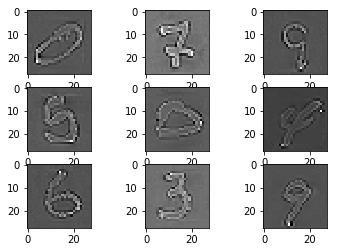

In [63]:
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import backend

backend.set_image_data_format('channels_first')

# Mnist数据集 下载链接：https://pan.baidu.com/s/1jH6uFFC 密码: dw3d
path = 'data/mnist.npz'
f = np.load(path)
X_train, y_train = f['x_train'], f['y_train']
X_validation, y_validation = f['x_test'], f['y_test']
f.close()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_validation = X_validation.reshape(X_validation.shape[0], 1, 28, 28).astype('float32')


# ZCA白化
img_gen = ImageDataGenerator(zca_whitening=True)
img_gen.fit(X_train)

for X_batch, y_batch in img_gen.flow(X_train, y_train, batch_size=9):
    for i in range(9):
        plt.subplot(331+i)
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.cm.gray)
    plt.show()
    break

### 图像随机旋转，移动，剪切和反转

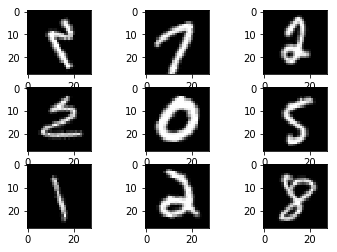

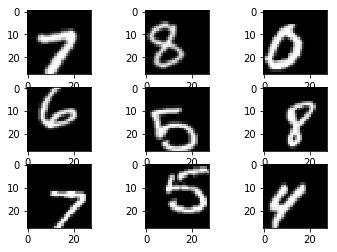

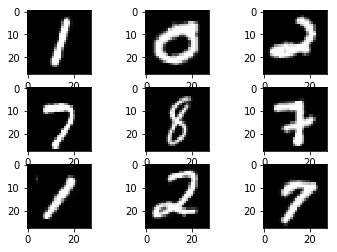

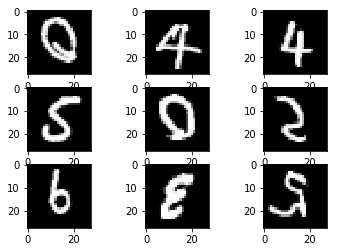

In [66]:
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import backend

backend.set_image_data_format('channels_first')

# 导入数据
# Mnist数据集 下载链接：https://pan.baidu.com/s/1jH6uFFC 密码: dw3d
path = 'data/mnist.npz'
f = np.load(path)
X_train, y_train = f['x_train'], f['y_train']
X_validation, y_validation = f['x_test'], f['y_test']
f.close()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_validation = X_validation.reshape(X_validation.shape[0], 1, 28, 28).astype('float32')

# 图像旋转
imgGen = ImageDataGenerator(rotation_range=90)
imgGen.fit(X_train)

for X_batch, y_batch in imgGen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(331 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

# 图像移动
imgGen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
imgGen.fit(X_train)

for X_batch, y_batch in imgGen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(331 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

# 图像剪切
imgGen = ImageDataGenerator(shear_range=13.2)
imgGen.fit(X_train)

for X_batch, y_batch in imgGen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(331 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

# 图像剪切
imgGen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
imgGen.fit(X_train)

for X_batch, y_batch in imgGen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(331 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

/home/sensehiso/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:787: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


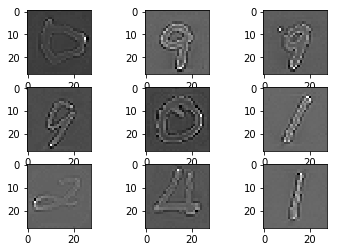

In [68]:
%matplotlib inline
import os
from matplotlib import pyplot as plt 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import backend

backend.set_image_data_format('channels_first')

# 导入数据
# Mnist数据集 下载链接：https://pan.baidu.com/s/1jH6uFFC 密码: dw3d
path = 'data/mnist.npz'
f = np.load(path)
X_train, y_train = f['x_train'], f['y_train']
X_validation, y_validation = f['x_test'], f['y_test']
f.close()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_validation = X_validation.reshape(X_validation.shape[0], 1, 28, 28).astype('float32')

# ZCA白化
imgGen = ImageDataGenerator(zca_whitening=True)
imgGen.fit(X_train)

# 创建目录，并保存图像
try:
    os.mkdir('image')
except:
    print('The fold is exist!')
    
for X_batch, y_batch in imgGen.flow(X_train, y_train, batch_size=9, save_to_dir='image', save_prefix='oct',
                                    save_format='png'):
    for i in range(9):
        plt.subplot(331 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

In [71]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras import backend
backend.set_image_data_format('channels_first')

# 设定随机种子
seed = 7
np.random.seed(seed=seed)

# 导入数据
(X_train, y_train), (X_validation, y_validation) = cifar10.load_data()

# 格式化数据到0-1之前
X_train = X_train.astype('float32')
X_validation = X_validation.astype('float32')
X_train = X_train / 255.0
X_validation = X_validation / 255.0

# one-hot编码
y_train = np_utils.to_categorical(y_train)
y_validation = np_utils.to_categorical(y_validation)
num_classes = y_train.shape[1]

def create_model(epochs=25):
    model = Sequential()
    # 32个3×3
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', 
                     kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # 64个3×3
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # 128个
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.2))
    # 1024个全连接层
    model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    lrate = 0.01
    decay = lrate / epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

epochs = 5
model = create_model(epochs)
model.fit(x=X_train, y=y_train, epochs=epochs, batch_size=50, verbose=2)
scores = model.evaluate(x=X_validation, y=y_validation, verbose=0)
print('Accuracy: %.2f%%' % (scores[1] * 100))


Epoch 1/5
 - 357s - loss: 1.9364 - acc: 0.2837
Epoch 2/5
 - 353s - loss: 1.5591 - acc: 0.4308
Epoch 3/5
 - 381s - loss: 1.4272 - acc: 0.4820
Epoch 4/5
 - 380s - loss: 1.3553 - acc: 0.5092
Epoch 5/5
 - 391s - loss: 1.3044 - acc: 0.5290
Accuracy: 53.09%
